### 공공데이터 상가(상권)정보_의료기관) 분석하기
* https://www.data.go.kr/data/15069540/fileData.do
* data.go.kr -> 상가(상권)정보_의료기관 검색

#### 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

#### 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Window의 한글 폰트 설정
(plt.rc('font',family = 'Malgun Gothic'))

#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

C:\Users\user\AppData\Local\Temp\ipykernel_2292\2511345648.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


#### 데이터 로드하기

In [3]:
df = pd.read_csv('./소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False, encoding='cp949')

df.shape

(91335, 39)

#### 데이터 미리보기

In [4]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4.130000e+24,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344


In [5]:
df.tail(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [6]:
df.sample()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
62201,22184918,마린시티종합동물병원,NaN,S,의료,S04,수의업,S04A01,수의업-종합,M73100,...,2.640000e+24,벽산이오렌지프라자,부산광역시 해운대구 마린시티3로 23,612020.0,48118.0,NaN,NaN,NaN,129.146952,35.156663


#### 데이터 요약보기

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [8]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<AxesSubplot:>

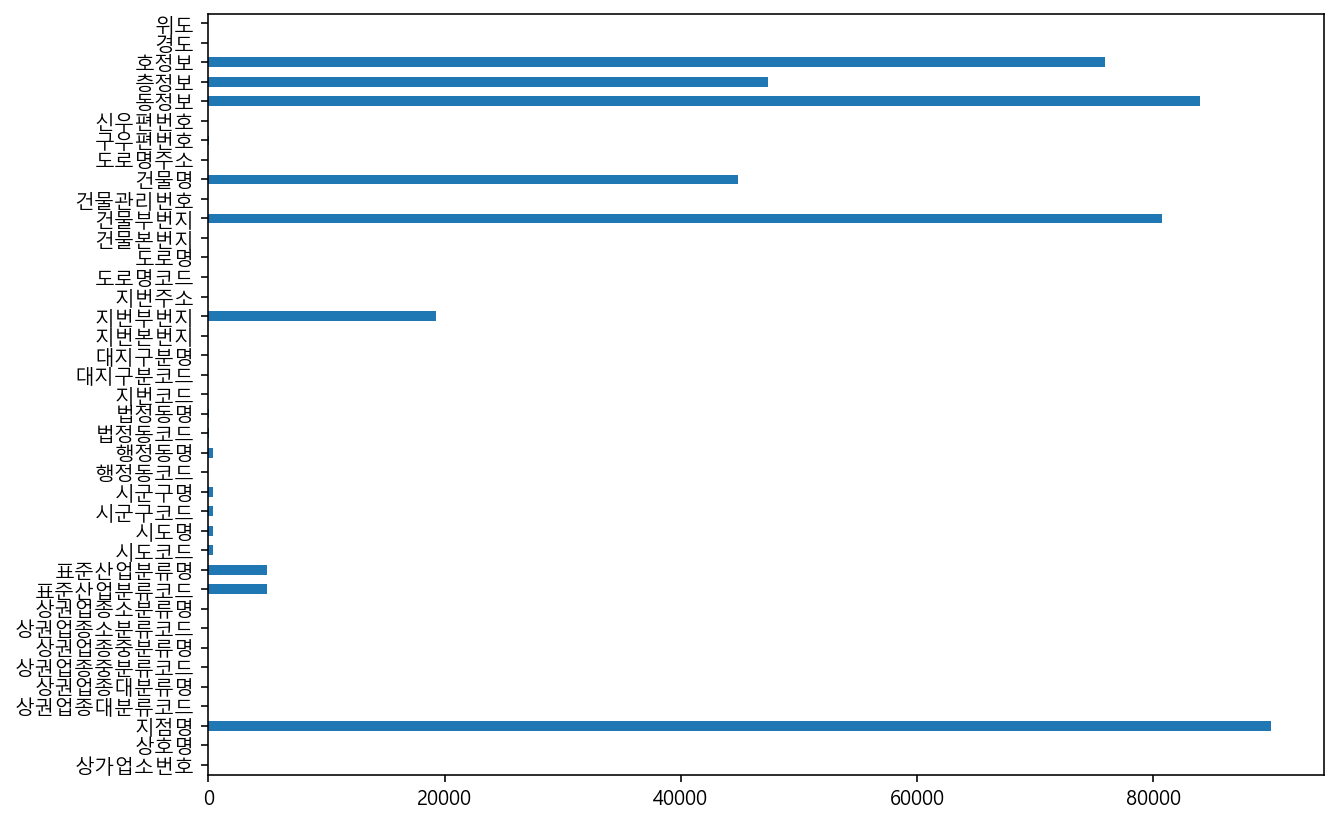

In [9]:
df.isnull().sum().plot.barh(figsize=(10,7))

In [10]:
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [11]:
df_null_count=df.isnull().sum()
df_null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

In [12]:
df_null_count=df.isnull().sum().reset_index()
df_null_count

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


#### 컬럼명 변경하기

In [13]:
df_null_count.columns = ['컬럼명','결측치수']
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [15]:
df_null_head = df_null_count.sort_values(by='결측치수', ascending=False).head(9)
df_null_head

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75898
35,층정보,47346
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922


In [17]:
df['지점명']

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [18]:
drop_columns = df_null_head['컬럼명'].values
drop_columns



array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [19]:
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업


In [20]:
print(df.shape)
df = df.drop(columns=drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 30)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  행정동코드      91335 non-null  int64  
 13  행정동명       90956 non-null  object 
 14  법정동코드      91280 non-null  float64
 15  법정동명       91280 non-null  object 
 16  지번코드       91335 non-null  float64
 17  대지구분코드     91335 non-null  int64  
 18  대지구분명      91335 non-null  object 
 19  지번본번지      91335 non-null  int64  
 20  지번주소  

### 기초 통계값 보기


#### 기초 통계 수치

In [25]:
df['위도'].mean()

36.62471119236107

In [24]:
df['위도'].median()

37.23465232

In [26]:
df['위도'].max()

38.49965857

In [27]:
df['위도'].min()

33.21928967

In [28]:
df['위도'].count()

91335

#### 기초통계값 요약하기 - describe

In [30]:
df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [31]:
df[['위도','경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084551
75%,37.507463,128.108919
max,38.499659,130.909912


In [32]:
df.describe(include=pd.np.object)

C:\Users\user\AppData\Local\Temp\ipykernel_2292\3447166667.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.describe(include=pd.np.object)
C:\Users\user\AppData\Local\Temp\ipykernel_2292\3447166667.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=pd.np.object)


,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335
unique,56908,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198


#### 중복제거한 값 보기

In [33]:
df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [34]:
df['상권업종대분류명'].nunique()

1

In [35]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [36]:
df['상권업종소분류명'].nunique()

34

In [37]:
df['상권업종소분류명'].nunique()

34

In [40]:
len(df['상권업종소분류명'].unique())

34

#### 그룹화된 요약값 보기 - value_counts

In [41]:
df['시도코드'].value_counts()

41.0    21374
11.0    18943
26.0     6473
48.0     4973
28.0     4722
27.0     4597
47.0     4141
45.0     3894
44.0     3578
46.0     3224
29.0     3214
30.0     3067
43.0     2677
42.0     2634
31.0     1997
50.0     1095
36.0      353
Name: 시도코드, dtype: int64

In [47]:
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [45]:
#normalize=True 옵션을 사용하면 비율을 구할 수 있음
df['시도명'].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<AxesSubplot:>

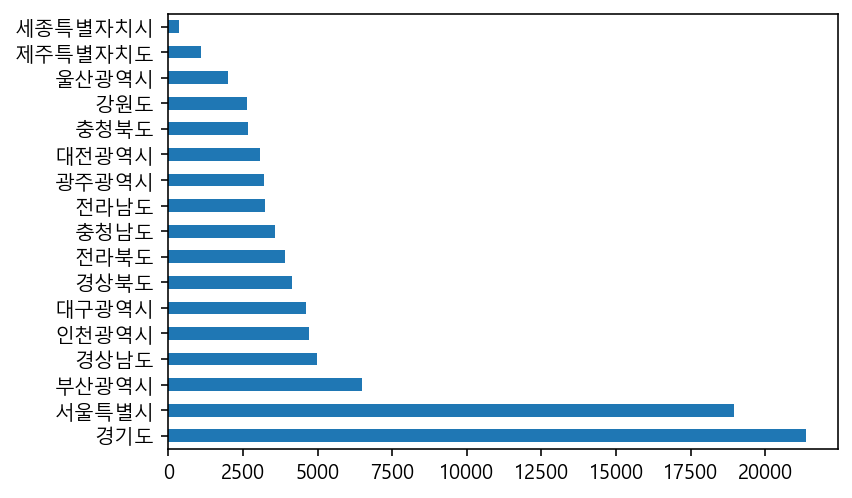

In [46]:
df["시도명"].value_counts().plot.barh()

<AxesSubplot:ylabel='시도명'>

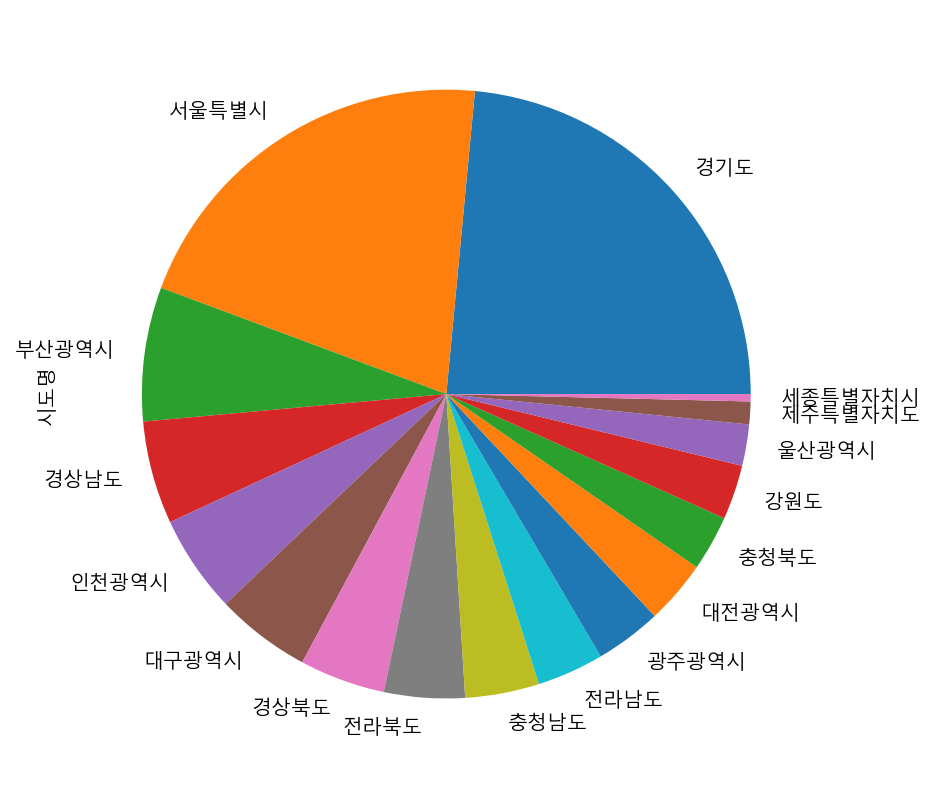

In [48]:
df["시도명"].value_counts().plot.pie(figsize=(7,7))

<AxesSubplot:xlabel='count', ylabel='시도명'>

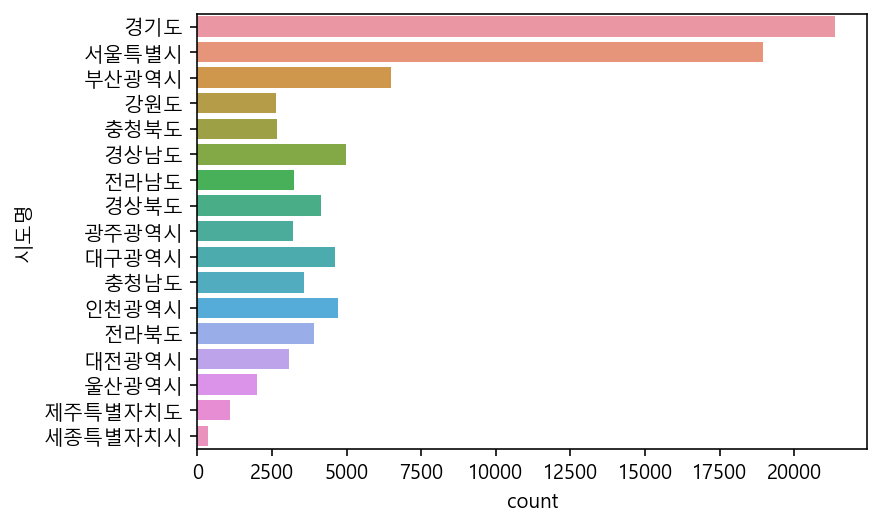

In [49]:
sns.countplot(data=df, y='시도명')

In [50]:
df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [51]:
df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [52]:
df['상권업종중분류명'].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

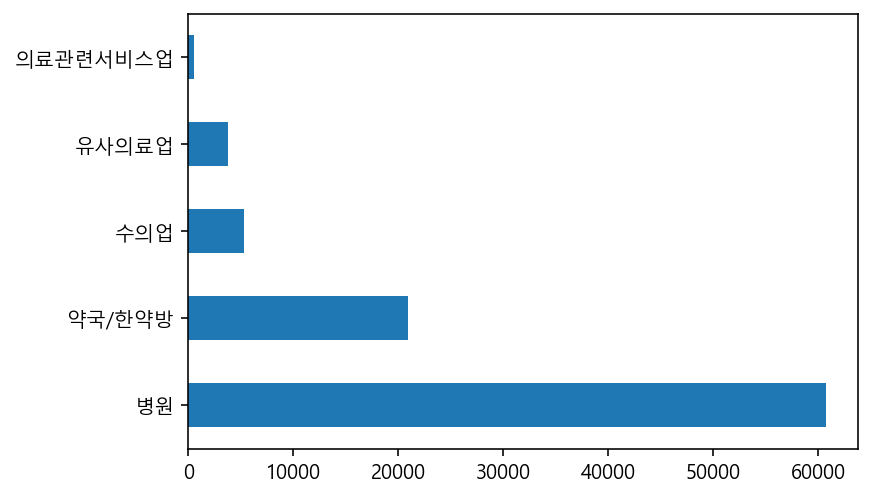

In [63]:
df['상권업종중분류명'].value_counts().plot.barh()

<AxesSubplot:ylabel='상권업종중분류명'>

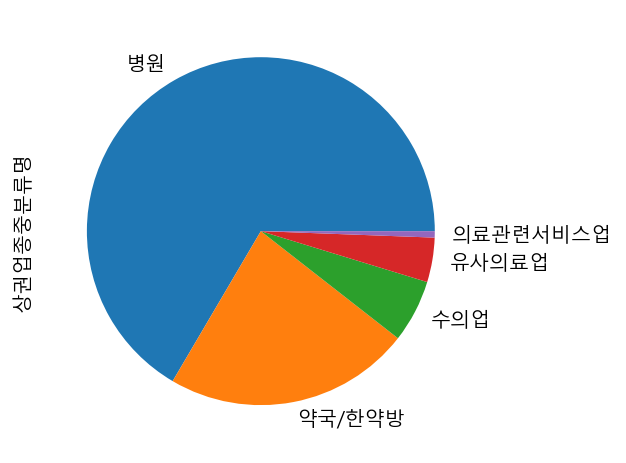

In [62]:
df['상권업종중분류명'].value_counts().plot.pie()

In [56]:
df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

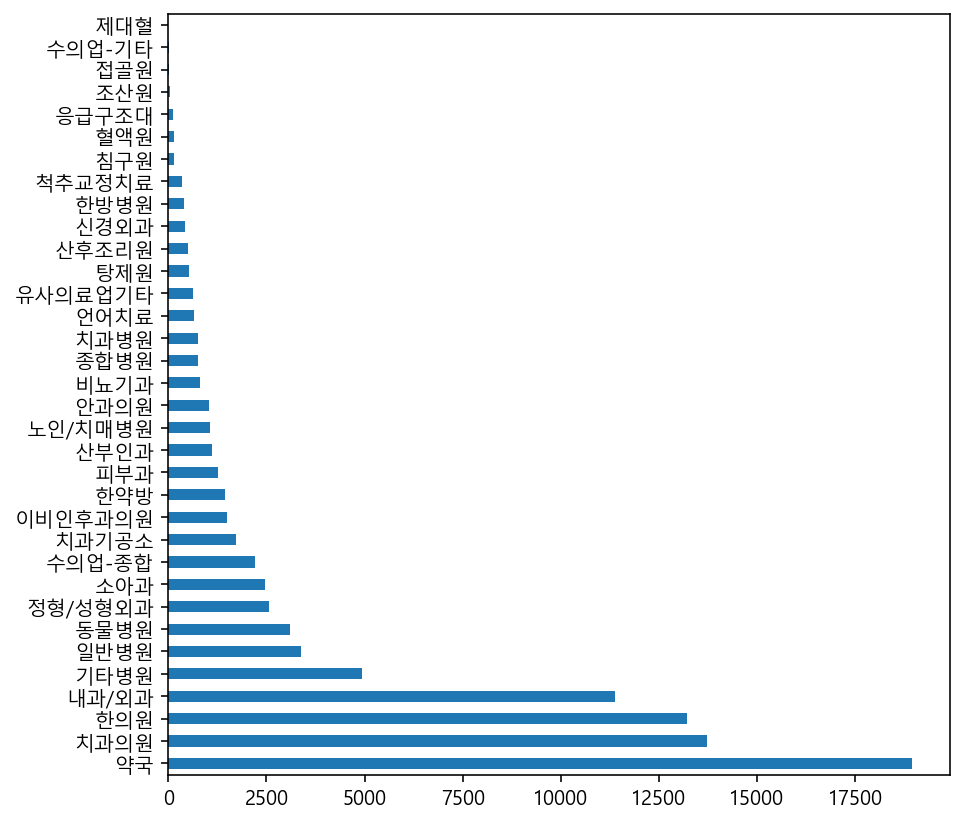

In [61]:

df['상권업종소분류명'].value_counts().plot.barh(figsize=(7,7))

#### 데이터 색인하기

In [59]:
df_medical = df[df['상권업종중분류명'] == '약국/한약방']
df_medical.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,4.150000e+11,경기도 용인시 수지구 문정로,32,4.150000e+24,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528


In [64]:
shop_type = df['상권업종대분류명'] == '의료'
df.loc[shop_type, '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [65]:
df.loc[df['상권업종대분류명']=='의료','상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [ ]:
#유사 의료업 모으기

In [82]:
df_medi = df[df['상권업종중분류명'] == '유사의료업']
df_medi. shape

(3774, 30)

In [74]:
df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [83]:
df_medi['상호명'].value_counts().head(10)

리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: 상호명, dtype: int64

In [84]:
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") &
    (df['시도명']== '서울특별시')]
df_seoul_drug.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,1.170000e+11,서울특별시 강남구 테헤란로,101,1.170000e+24,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656



#### 구별로 보기

In [85]:
df_seoul_drug['시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [86]:
df_seoul_drug['시군구명'].value_counts(normalize=True)

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

<AxesSubplot:>

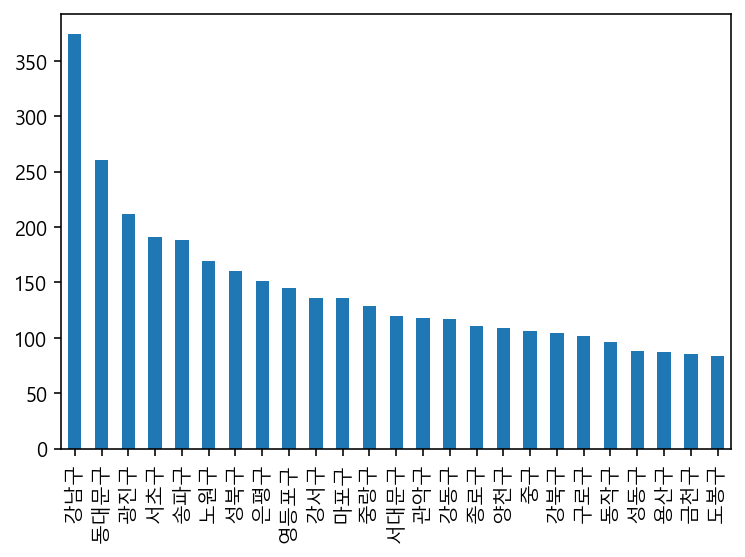

In [87]:
df_seoul_drug['시군구명'].value_counts().plot.bar()


In [88]:
#'상권업종소분류명'이 '종합병원'인 것과
#'시도명'이 '서울특별시'인 데이터만 가져옵니다.df_seoul_drug
df_seoul_hospital = df[
    (df['상권업종소분류명'] == '종합병원') &
    (df['시도명']=='서울특별시')]
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,11.0,서울특별시,...,서울특별시 광진구 중곡동 58-25,1.120000e+11,서울특별시 광진구 긴고랑로,119,1.120000e+24,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


#### 텍스트 데이터 색인하기

In [90]:
df[df['상호명'].str.contains('대학병원')].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
193,23651380,동국대학병원일산,S,의료,S01,병원,S01B01,종합병원,41.0,경기도,...,경기도 고양시 일산동구 식사동 814,4.130000e+11,경기도 고양시 일산동구 동국로,27,4.130000e+24,경기도 고양시 일산동구 동국로 27,410773.0,10326.0,126.805548,37.676425


In [96]:
df[df['도로명주소'].str.startswith('서울')].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,11.0,서울특별시,...,서울특별시 강남구 도곡동 467-14,1.170000e+11,서울특별시 강남구 언주로30길,39,1.170000e+24,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742


In [97]:
df[df['상호명'].str.endswith('병원')].head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
5,20809147,행신동물병원,S,의료,S04,수의업,S04A02,동물병원,41.0,경기도,...,경기도 고양시 덕양구 행신동 647-14,4.130000e+11,경기도 고양시 덕양구 행신로,147,4.130000e+24,경기도 고양시 덕양구 행신로 147,412220.0,10517.0,126.831632,37.619309


In [98]:
df_seoul = df[df['시도명'] == '서울특별시'].copy()
df_seoul.shape

(18943, 30)

<AxesSubplot:xlabel='count', ylabel='시군구명'>

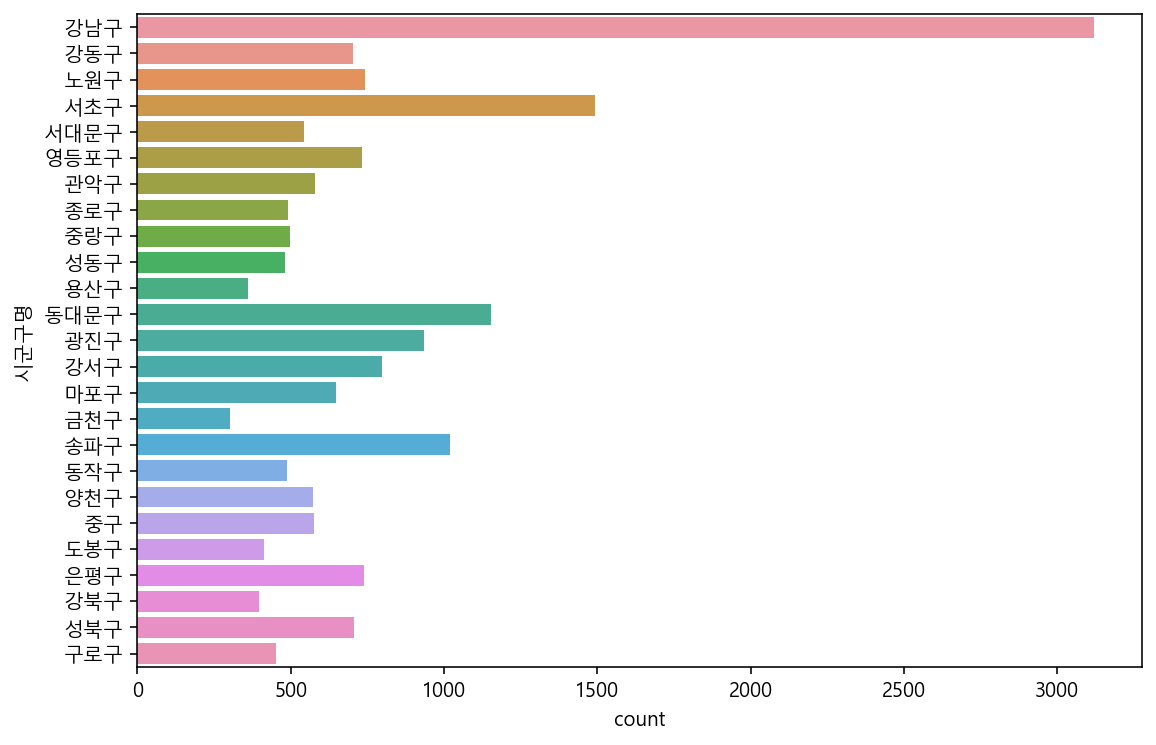

In [99]:
plt.figure(figsize=(9,6))
sns.countplot(data=df_seoul, y='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

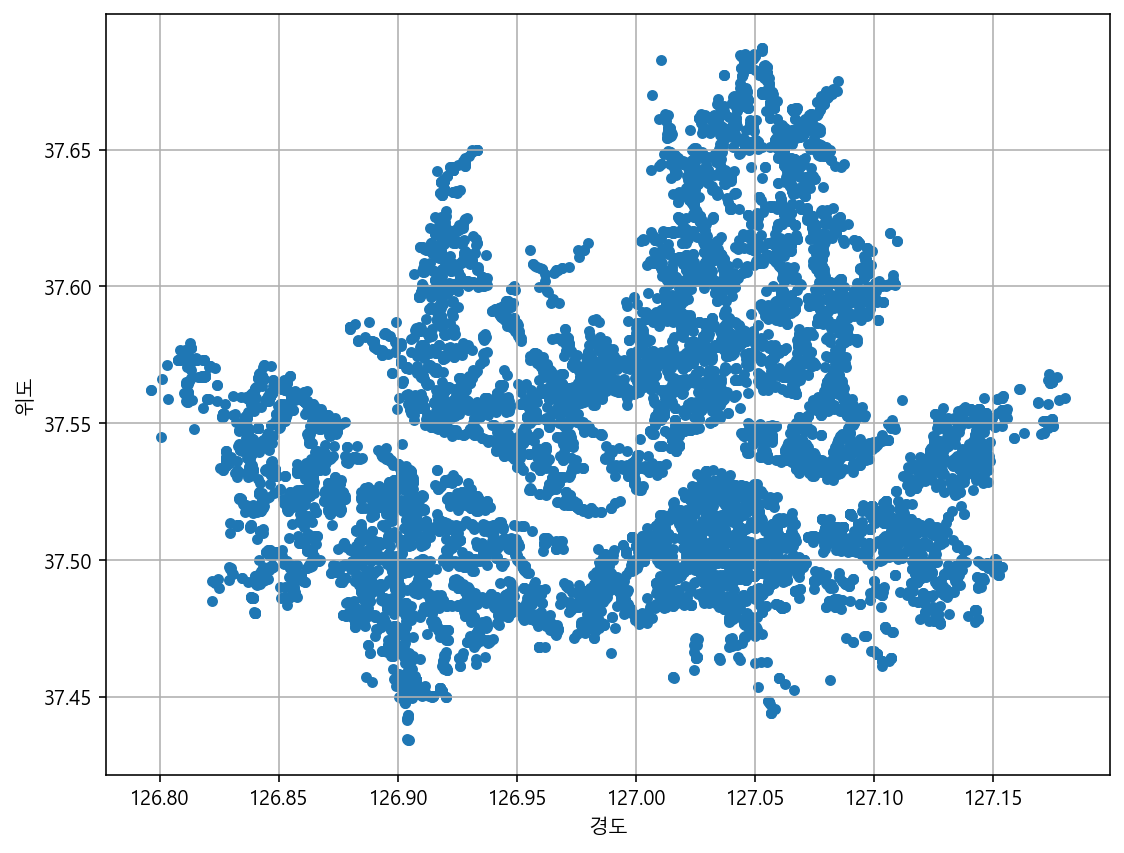

In [100]:
df_seoul[['경도','위도','시군구명']].plot.scatter(x='경도',y='위도',figsize=(9,7),grid=True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

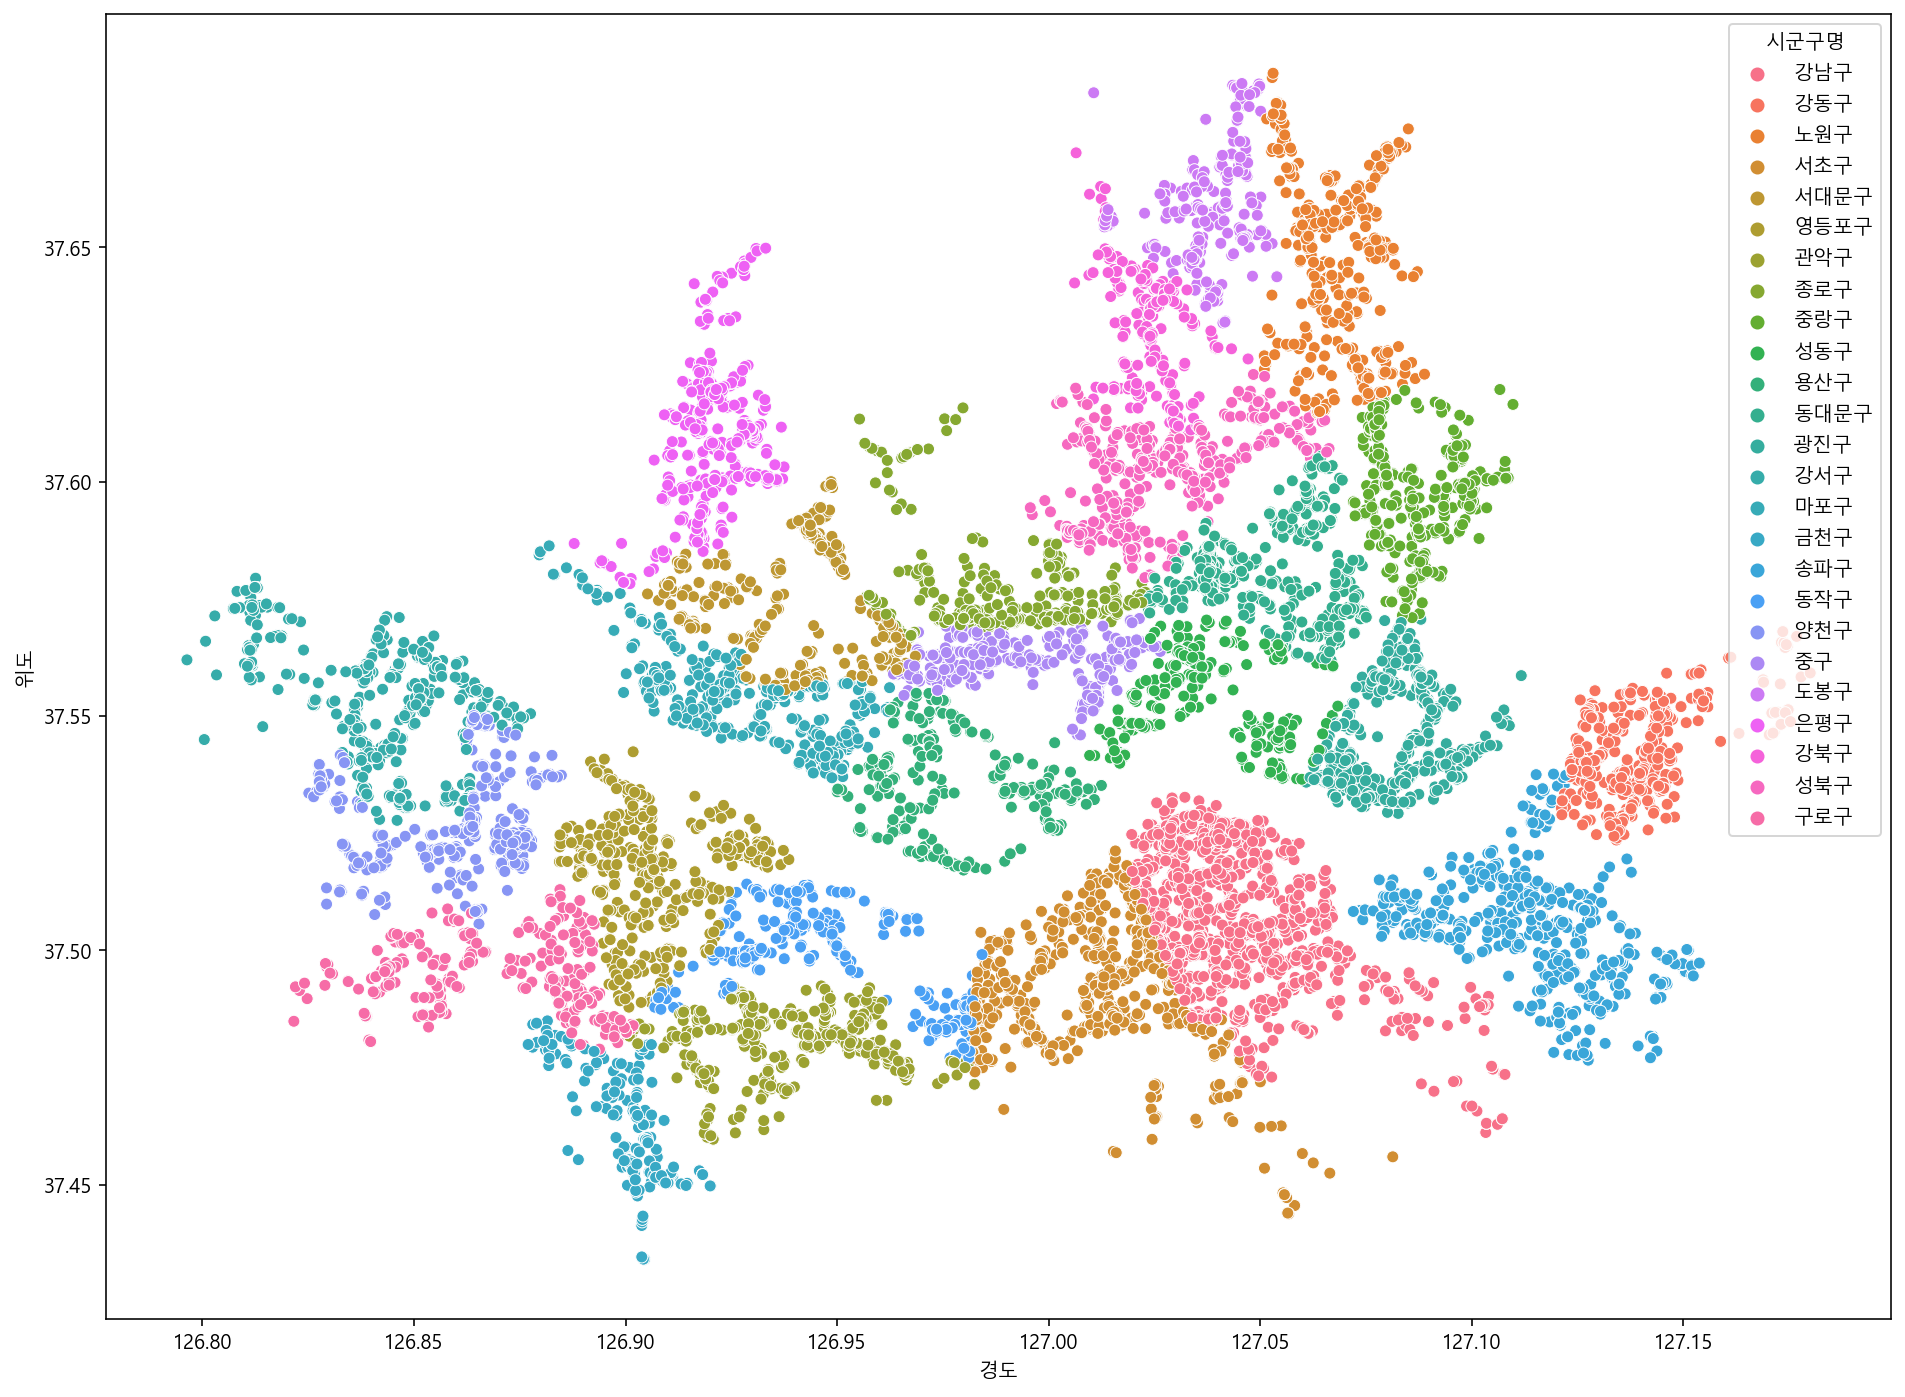

In [106]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_seoul,
                x='경도',y='위도',hue='시군구명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

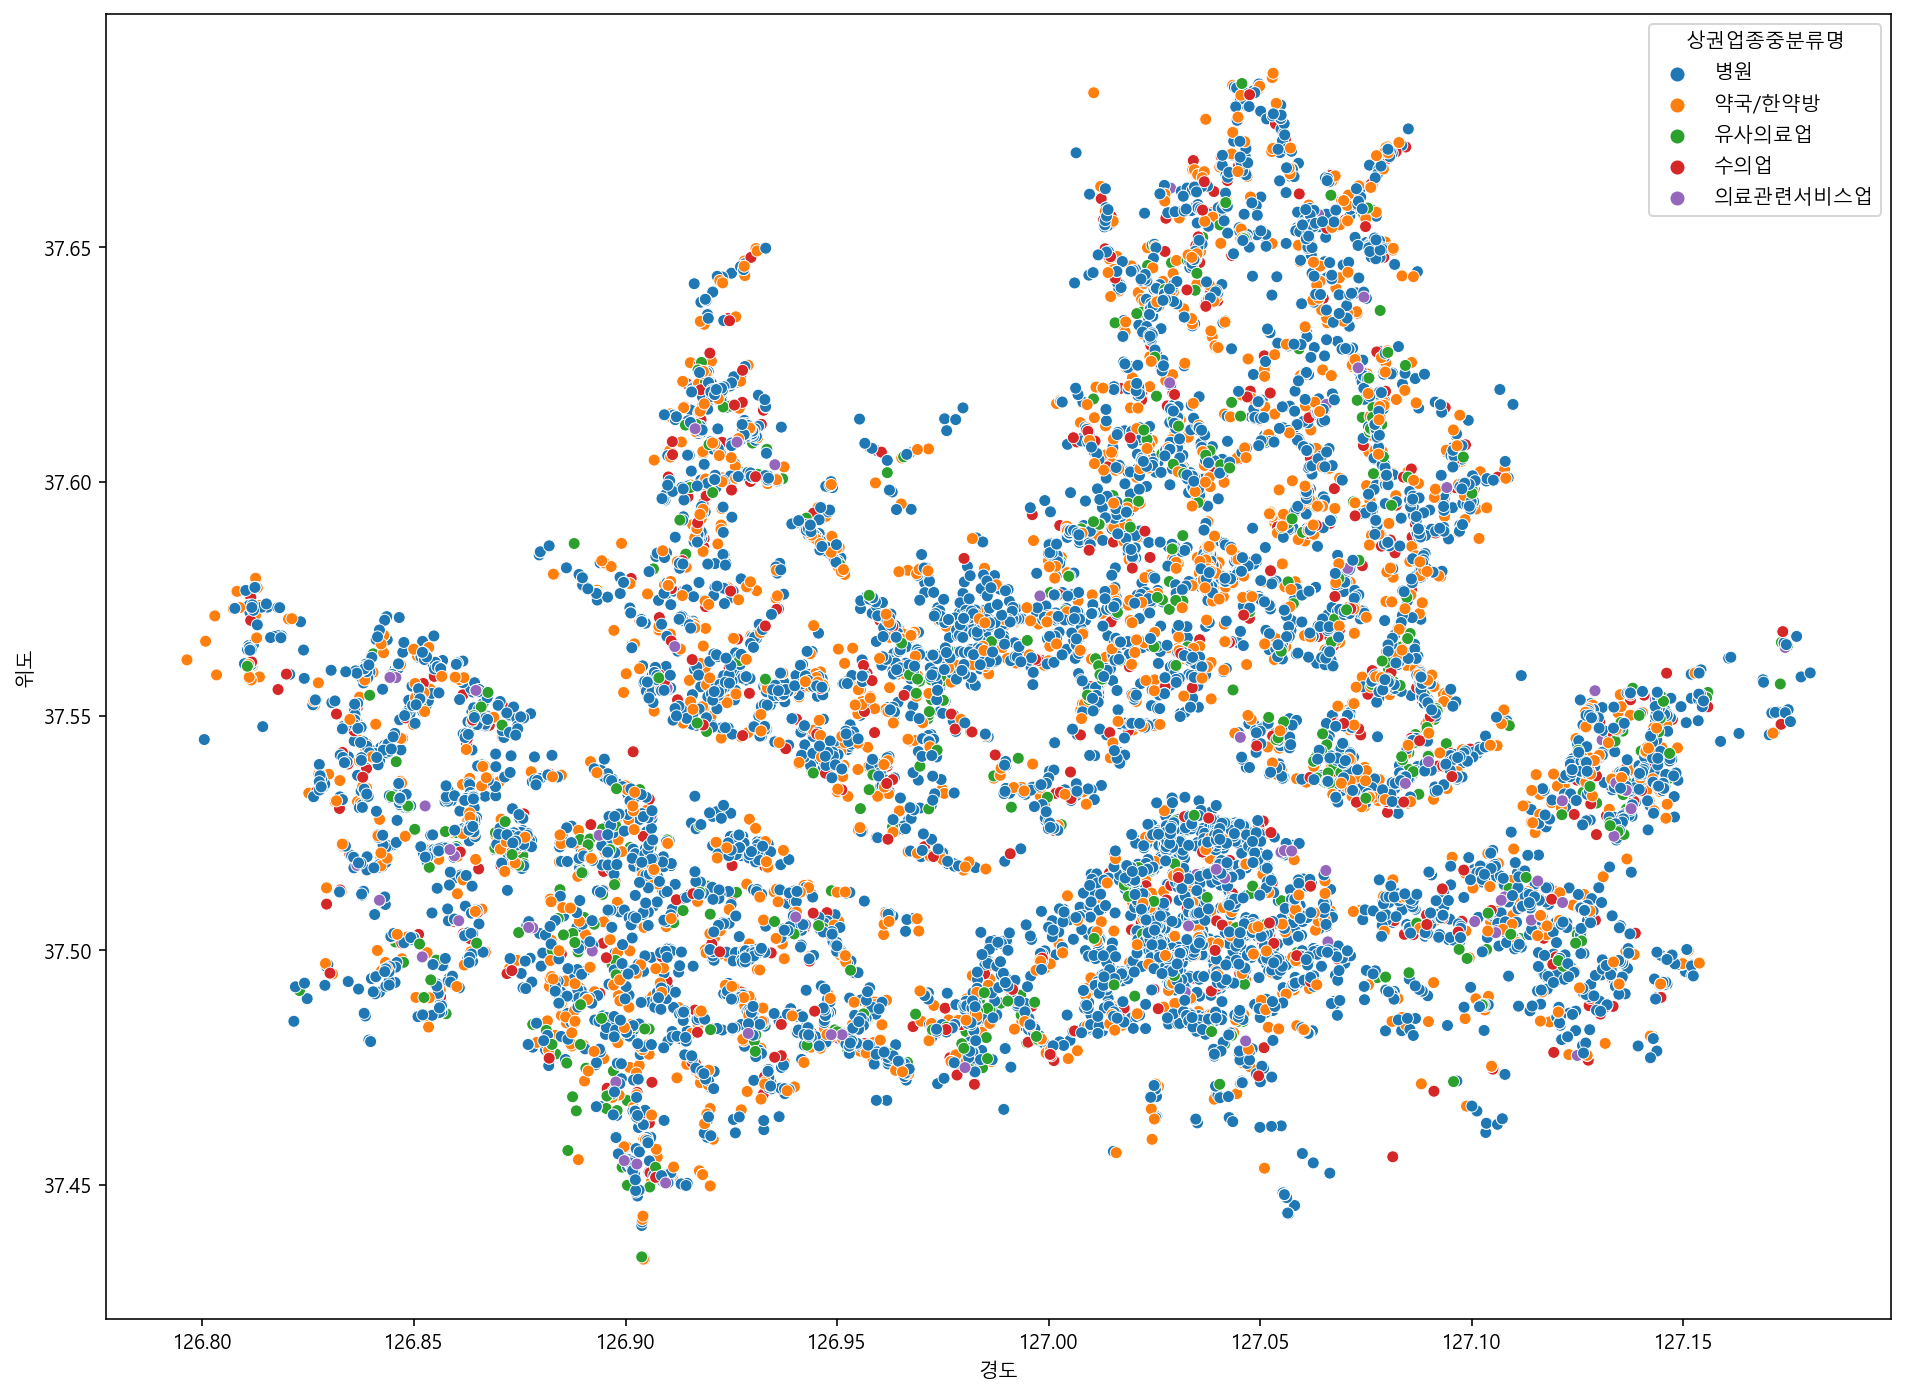

In [107]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=df_seoul,
                x='경도',y='위도',hue='상권업종중분류명')

#### 지도 시각화

In [115]:
import folium

In [130]:
geo_df = df_seoul_hospital.copy()

In [140]:
#지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
map = folium.Map(location=[geo_df['위도'].mean(),geo_df['경도'].mean()],
                zoom_start=12)

for n in geo_df.index:
    #팝업에 들어갈 텍스트를 지정해줍니다.
    #상호명과 주소를 붙여서 출력되도록 합니다.
    popup_name =geo_df.loc[n, '상호명'] + '-' + geo_df.loc[n, '도로명주소']
    
    iframe = folium.IFrame(popup_name, width=300, height=300)
    popup = folium.Popup(iframe, max_width=600)
    
    folium.Marker(
    location = [geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
         popup = popup_name
        
    ). add_to(map)
    
map

In [142]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)
for n in geo_df.index:
    popup_name= geo_df.loc[n,'상호명']+ '-' + geo_df.loc[n,'도로명주소']
    folium.Marker(
    location=[geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
        popup = '<pre>%s<pre/>'%popup_name
    ).add_to(map)
map

In [133]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                 zoom_start=12)
for n in geo_df.index:
    popup_name= geo_df.loc[n,'상호명']+ '-' + geo_df.loc[n,'도로명주소']
    iframe = folium.IFrame(popup_name, width=300, height=300)
    popup = folium.Popup(iframe, max_width=600)
    folium.Marker(
    location=[geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
        popup = popup
    ).add_to(map)
map

In [143]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                zoom_start = 12)

for n in geo_df.index:
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n,'도로명주소']
    
    folium.Marker(
        location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
        popup = '<pre>%s</pre>'%popup_name
    ).add_to(map)
    
map